# Simply copy the code from day 5

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
california_housing= fetch_california_housing(as_frame=True)

In [3]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


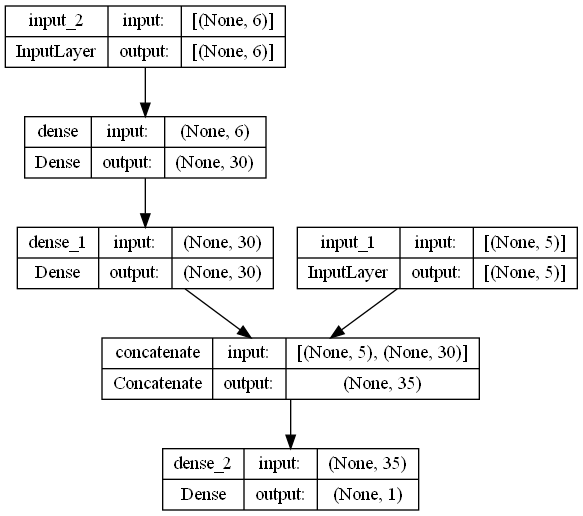

In [4]:
from tensorflow import keras
input_A=keras.layers.Input(shape=[5])
input_B=keras.layers.Input(shape=[6])
hidden1=keras.layers.Dense(30,activation="relu")(input_B)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_A,input_B],outputs=[output])
keras.utils.plot_model(model, show_shapes=True)

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           210         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [6]:
model.compile(loss="mse",optimizer="adam",metrics=['accuracy'])

# Preprocess the datasets to train the module 

In [7]:
x_train_full,x_test, y_train_full, y_test=train_test_split(california_housing.data,california_housing.target)

In [8]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full)

In [9]:
x_train_A,x_train_B=x_train.iloc[:, :5],x_train.iloc[:, 2:]
x_valid_A,x_valid_B=x_valid.iloc[:,:5],x_valid.iloc[:,2:]
x_test_A,x_test_B=x_test.iloc[:,:5],x_test.iloc[:,2:]
x_new_A,x_new_B=x_test_A.iloc[:3],x_test_B.iloc[:3]

In [10]:
history=model.fit((x_train_A,x_train_B),y_train,epochs=10,validation_data=((x_valid_A,x_valid_B),y_valid),batch_size=16)

Epoch 1/10
726/726 [==============================] - 2s 2ms/step - loss: 4630.9087 - accuracy: 0.0016 - val_loss: 12.8627 - val_accuracy: 0.0013
Epoch 2/10
726/726 [==============================] - 1s 1ms/step - loss: 12.0144 - accuracy: 0.0017 - val_loss: 10.3948 - val_accuracy: 0.0013
Epoch 3/10
726/726 [==============================] - 1s 1ms/step - loss: 9.6555 - accuracy: 0.0016 - val_loss: 7.6747 - val_accuracy: 0.0013
Epoch 4/10
726/726 [==============================] - 1s 1ms/step - loss: 7.3506 - accuracy: 0.0016 - val_loss: 5.2197 - val_accuracy: 0.0021
Epoch 5/10
726/726 [==============================] - 1s 1ms/step - loss: 4.9715 - accuracy: 0.0018 - val_loss: 3.2799 - val_accuracy: 0.0021
Epoch 6/10
726/726 [==============================] - 1s 1ms/step - loss: 3.3763 - accuracy: 0.0022 - val_loss: 3.0144 - val_accuracy: 0.0021
Epoch 7/10
726/726 [==============================] - 1s 1ms/step - loss: 8.3118 - accuracy: 0.0024 - val_loss: 2.0930 - val_accuracy: 0.0031


In [11]:
mse_test=model.evaluate((x_test_A,x_test_B),y_test)

162/162 [==============================] - 0s 938us/step - loss: 6.8845 - accuracy: 9.6899e-04


In [12]:
y_pred=model.predict((x_new_A,x_new_B))

1/1 [==============================] - 0s 85ms/step


In [13]:
y_test[:3]

5767     2.380
9465     1.316
16005    3.495
Name: MedHouseVal, dtype: float64

In [14]:
y_pred

array([[0.8208547 ],
       [0.96618706],
       [1.6834607 ]], dtype=float32)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

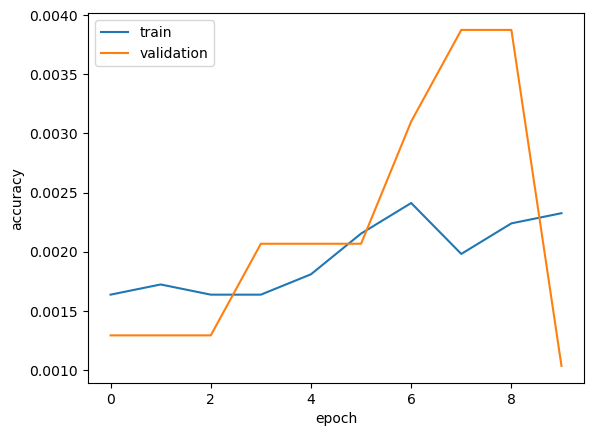

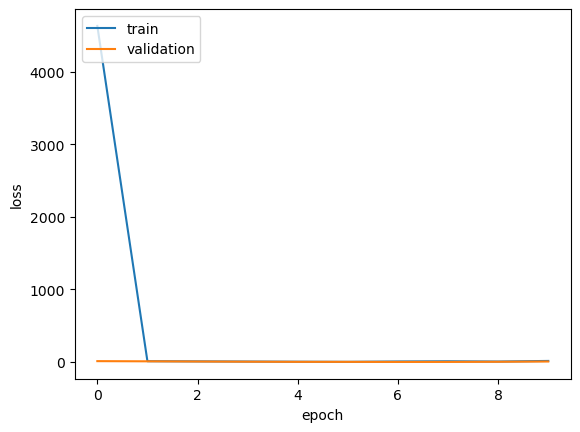

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

# Day 8 Saving and and Restoring the model

In [39]:
model.save("My_keras_model.h5")

Keras will save both the model's architecture (including every layer's hyperparameters) and the value of all the model parameters for every layer (eg connection weights and biases) ,  using the HDF5 format. It also saves the optimizer (including its hyperparameters and any state it may have).

In [40]:
## Restore
model=keras.models.load_model("My_keras_model.h5")

# Using Callback

But what if training lasts several hours? This is quite common, especially when training on large datasets. In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training. But how can you tell the fit method to save checkpoints() ? The answer is: using callback

The fit() method accepts a callback argument that lets you specify a list of objects that keras will call during training at the start and end of training, at the start and end of each epoch and even before and after processing each batch. For example, the ModelCheckpoint callback saves checkpoints of your model at regular interval during training, by default at the end of each epoch 

In [42]:
# Build and compile the model
checkpoint_cb=keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history=model.fit((x_train_A,x_train_B),y_train,epochs=10,callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.7935 - accuracy: 0.0024
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 8.7021 - accuracy: 0.0022
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 1.2431 - accuracy: 0.0026
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 1.1743 - accuracy: 0.0026
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 2.9307 - accuracy: 0.0027
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 44.2285 - accuracy: 0.0020
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 4.5015 - accuracy: 0.0022
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 1.0896 - accuracy: 0.0026
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 1.3373 - accuracy: 0.0027
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 12.7788 - accuracy: 0.00

Moreover, if you use a validation set during training, you can set save_best_only = True when cerating the ModelCheckpoint. In this case,it will only save your model when its performance on the validation set is best so far .

In [43]:
checkpoint_cb =keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
history=model.fit((x_train_A,x_train_B),y_train,
                  epochs=10,
                  validation_data=((x_valid_A,x_valid_B),y_valid),
                  batch_size=16,
                 callbacks=[checkpoint_cb])


Epoch 1/10
726/726 [==============================] - 1s 2ms/step - loss: 13.0666 - accuracy: 0.0026 - val_loss: 0.7957 - val_accuracy: 0.0039
Epoch 2/10
726/726 [==============================] - 1s 1ms/step - loss: 3.7733 - accuracy: 0.0024 - val_loss: 0.8827 - val_accuracy: 0.0036
Epoch 3/10
726/726 [==============================] - 1s 1ms/step - loss: 10.9210 - accuracy: 0.0023 - val_loss: 1.3508 - val_accuracy: 0.0034
Epoch 4/10
726/726 [==============================] - 1s 1ms/step - loss: 4.5339 - accuracy: 0.0022 - val_loss: 1.1252 - val_accuracy: 0.0036
Epoch 5/10
726/726 [==============================] - 1s 1ms/step - loss: 40.9945 - accuracy: 0.0024 - val_loss: 23.4894 - val_accuracy: 5.1680e-04
Epoch 6/10
726/726 [==============================] - 1s 2ms/step - loss: 1.7173 - accuracy: 0.0026 - val_loss: 0.6809 - val_accuracy: 0.0039
Epoch 7/10
726/726 [==============================] - 1s 1ms/step - loss: 1.2639 - accuracy: 0.0027 - val_loss: 1.0005 - val_accuracy: 0.003

# Early Stopping

In [45]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,
                                               restore_best_weights=True)
history=model.fit((x_train_A,x_train_B),y_train,
                  epochs=100,
                  validation_data=((x_valid_A,x_valid_B),y_valid),
                  batch_size=16,
                 callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
726/726 [==============================] - 1s 1ms/step - loss: 4.3613 - accuracy: 0.0025 - val_loss: 5.3513 - val_accuracy: 0.0036
Epoch 2/100
726/726 [==============================] - 1s 1ms/step - loss: 4.6427 - accuracy: 0.0026 - val_loss: 0.8674 - val_accuracy: 0.0034
Epoch 3/100
726/726 [==============================] - 1s 1ms/step - loss: 6.7204 - accuracy: 0.0025 - val_loss: 4.5684 - val_accuracy: 0.0018
Epoch 4/100
726/726 [==============================] - 1s 1ms/step - loss: 38.6912 - accuracy: 0.0022 - val_loss: 0.9073 - val_accuracy: 0.0034
Epoch 5/100
726/726 [==============================] - 1s 1ms/step - loss: 0.8852 - accuracy: 0.0028 - val_loss: 0.6471 - val_accuracy: 0.0039
Epoch 6/100
726/726 [==============================] - 1s 1ms/step - loss: 0.9089 - accuracy: 0.0028 - val_loss: 0.6494 - val_accuracy: 0.0039
Epoch 7/100
726/726 [==============================] - 1s 1ms/step - loss: 7.6278 - accuracy: 0.0025 - val_loss: 13.8814 - val_accuracy: 0.00